In [335]:
%matplotlib inline
from matplotlib import style, figure
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [281]:
import numpy as np
import pandas as pd

In [282]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [283]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [284]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [285]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [286]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [287]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [288]:
# Create our session (link) from Python to the DB
session = Session(engine)

#### Climate/Precipitation  Scores Analysis####

In [289]:
# To get the all Dates
one_year_range= session.query(Measurement.date).order_by(Measurement.date.desc()).all()
one_year_range

[('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-09'),
 ('2017-08-09'),
 ('2017-08-09'

In [290]:
# To get the First Date
one_year_range=one_year_range[0]

In [291]:
# Calculate the date 1 year ago from the last data point in the database
days_12months_past = dt.date(2017,8,23) - dt.timedelta(days=365)
days_12months_past

datetime.date(2016, 8, 23)

In [292]:
# Perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= days_12months_past).all()
precipitation_scores


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [293]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_yearly_precipitation_scores=pd.DataFrame(precipitation_scores)
df_yearly_precipitation_scores.head(12)

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
5,2016-08-28,0.01
6,2016-08-29,0.00
7,2016-08-30,0.00
8,2016-08-31,0.13
9,2016-09-01,0.00


In [332]:
# Sort the dataframe by date
df_yearly_precipitation_scores.set_index('date').head(12)

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13


# Exploratory Climate Analysis

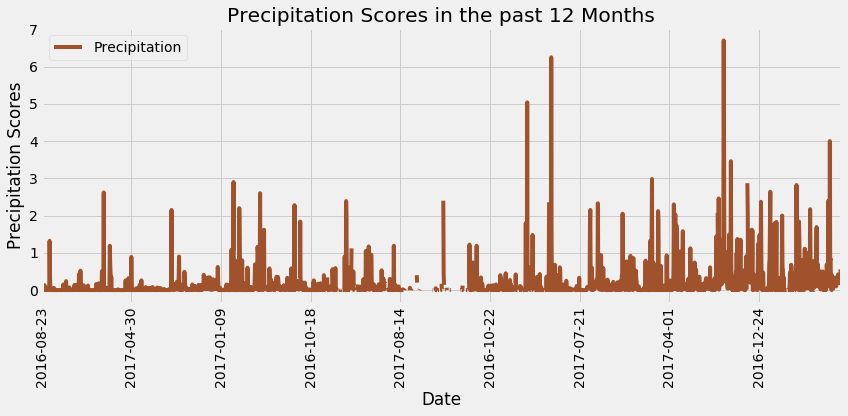

In [375]:
# referenced the dataframe
df_yearly_precipitation_scores.plot('date', 'prcp',color="sienna",figsize =(12,6))
plt.xlabel("Date")
plt.ylabel("Precipitation Scores")
plt.title("Precipitation Scores in the past 12 Months")
plt.legend(["Precipitation"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [401]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_yearly_precipitation_scores.describe(include='all')

,date,prcp
count,2230,2021.000000
unique,366,NaN
top,2017-03-28,NaN
freq,7,NaN
mean,NaN,0.177279
std,NaN,0.461190
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.020000
75%,NaN,0.130000


In [399]:
# Design a query to show how many stations are available in this dataset?
number_of_stations = session.query(Measurement.station).distinct().count()
print(f"number_of_stations: {number_of_stations} ")

number_of_stations: 9 


In [298]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, 
                                func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

print("List of Active Stations")
active_stations

List of Active Stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [299]:
#what stations have the most rows?
top_most_active_station=active_stations[0][0]
top_most_active_station

'USC00519281'

In [300]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 

# highest temperature recorded, and average temperature most active station?
top_most_active_station_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).filter(Measurement.station == top_most_active_station).all()
top_most_active_station_temps

[(54.0, 85.0, 71.66378066378067)]

In [301]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


top_most_active_station=active_stations[0][0]

temps_records = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == top_most_active_station).\
    filter(Measurement.date > days_12months_past).\
    order_by(Measurement.date).all()
temps_records


[('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC00519281', '2016-09-18', 78.0),
 ('USC005192

In [302]:
df_temps_records =pd.DataFrame(temps_records)
df_temps_records.head()

,station,date,tobs
0,USC00519281,2016-08-24,77.0
1,USC00519281,2016-08-25,80.0
2,USC00519281,2016-08-26,80.0
3,USC00519281,2016-08-27,75.0
4,USC00519281,2016-08-28,73.0


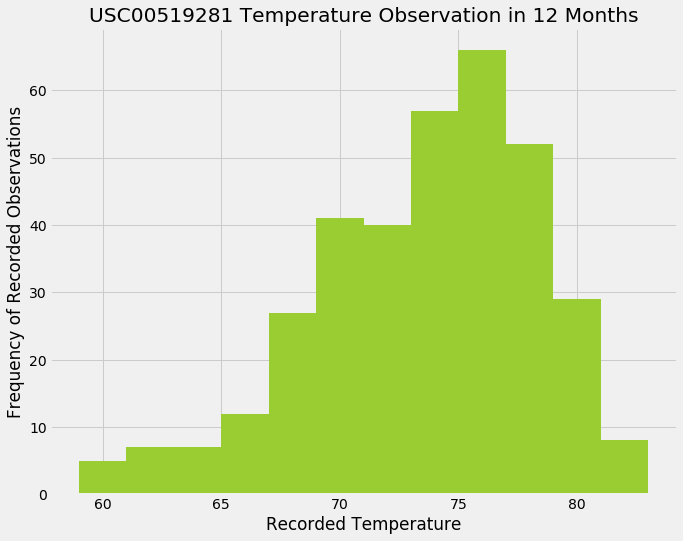

In [381]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

plt.hist(df_temps_records['tobs'],12,color="yellowgreen")
plt.rcParams["figure.figsize"] = [12,8]
plt.xlabel("Recorded Temperature")
plt.ylabel("Frequency of Recorded Observations")
plt.title("USC00519281 Temperature Observation in 12 Months")
plt.show()

In [304]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [305]:
# Use your previous function `calc_temps` to calculate the trip_min, trip_avg, and trip_max 
trip = calc_temps('2017-08-01','2017-08-14')
trip
# for your trip using the previous year's data for those same dates.


[(71.0, 79.01785714285714, 84.0)]

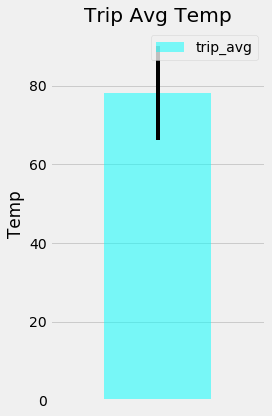

In [404]:
# Plot the results from your previous query as a bar chart. 
trip_df = pd.DataFrame(trip, columns=['trip_min', 'trip_avg', 'trip_max'])
# Use "Trip Avg Temp" as your Title

trip_df.plot.bar(y='trip_avg', yerr=(trip_df['trip_max'] - trip_df['trip_min']), title='Trip Avg Temp', color='cyan', alpha=0.5, figsize=(4,6))
plt.xticks(np.arange(1, 1.0))
plt.ylabel("Temp")
plt.tight_layout()
plt.show()